# End to End Deployment of Zomato Resturant Rating.ipynb

Packages


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.graph_objects as go
import plotly.offline as py

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor

Dataset


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "zomato.csv"

data = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "bansodesandeep/zomatocsv",
    file_path,
)
data.head()

100%|██████████| 89.0M/89.0M [00:01<00:00, 76.9MB/s]

Extracting zip of zomato.csv...


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Columns Description

 url- ulr of the website in the zomato website

 address- address of the restaurants

 name- name of the restaurants

 online_order- availability of online order

 book_table- table booking option available or not

 rate- overal rating out of 5

 votes- total number of rating for the restaurant

 phone- phone number of the restaurant

 location- the neighborhood in which the restaurant is located

 rest_type- restaurant type

 dish_liked- dishes people liked

 cuisines- food styles, separated by comma

 approx_cost(for two people)- approximate cost of food for two people

 reviews_list- list of tuples containing reviews for the restaurant, each tuple

 menu_item- list of menus in the restaurant

 listed_in(type)- type of meal

 listed_in(city)- contains the neighborhood in which the restaurant is listed

In [5]:
data.shape

(51717, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
data.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [8]:
# import ydata_profiling as pf
# pf.ProfieReport(df)

In [9]:
df = data.drop(['url', 'phone'], axis=1)

In [10]:
df.duplicated().sum()

np.int64(43)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,0
cuisines,0


Renaming columns

In [14]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [16]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Cleaning

In [19]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [20]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23395 non-null  object 
 1   name          23395 non-null  object 
 2   online_order  23395 non-null  object 
 3   book_table    23395 non-null  object 
 4   rate          23395 non-null  object 
 5   votes         23395 non-null  int64  
 6   location      23395 non-null  object 
 7   rest_type     23395 non-null  object 
 8   dish_liked    23395 non-null  object 
 9   cuisines      23395 non-null  object 
 10  cost          23395 non-null  float64
 11  reviews_list  23395 non-null  object 
 12  menu_item     23395 non-null  object 
 13  type          23395 non-null  object 
 14  city          23395 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.9+ MB


In [22]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
df = df.loc[df['rate'] != 'NEW']

In [24]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', ''))
df['rate'] = df['rate'].astype(float)
df['rate']

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51705,3.8
51707,3.9
51708,2.8
51711,2.5


## Visualisation

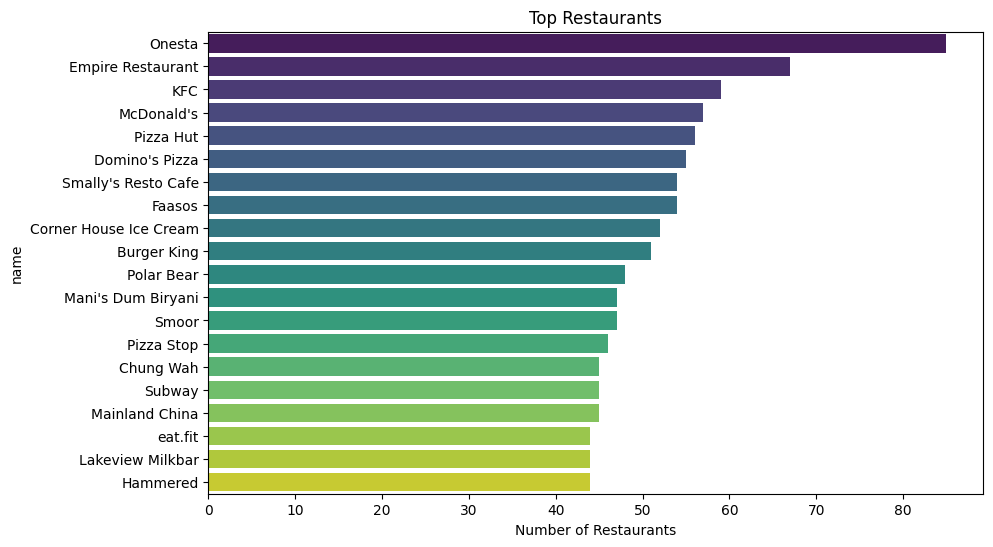

In [28]:
plt.figure(figsize=(10, 6))
chain = df['name'].value_counts()[:20]
sns.barplot(x=chain, y=chain.index, palette='viridis')
plt.xlabel('Number of Restaurants')
plt.title('Top Restaurants')
plt.show()

In [32]:
x = df['book_table'].value_counts()
color = ['#800080', '#000A0']

trace = go.Pie(labels=x.index, values=x, textinfo='value',
               marker=dict(colors=color,
                           line=dict(color='#001000', width=2)))
layout = go.Layout(title='Table booking', width=600, height=600)
fig=go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chat_subplots')

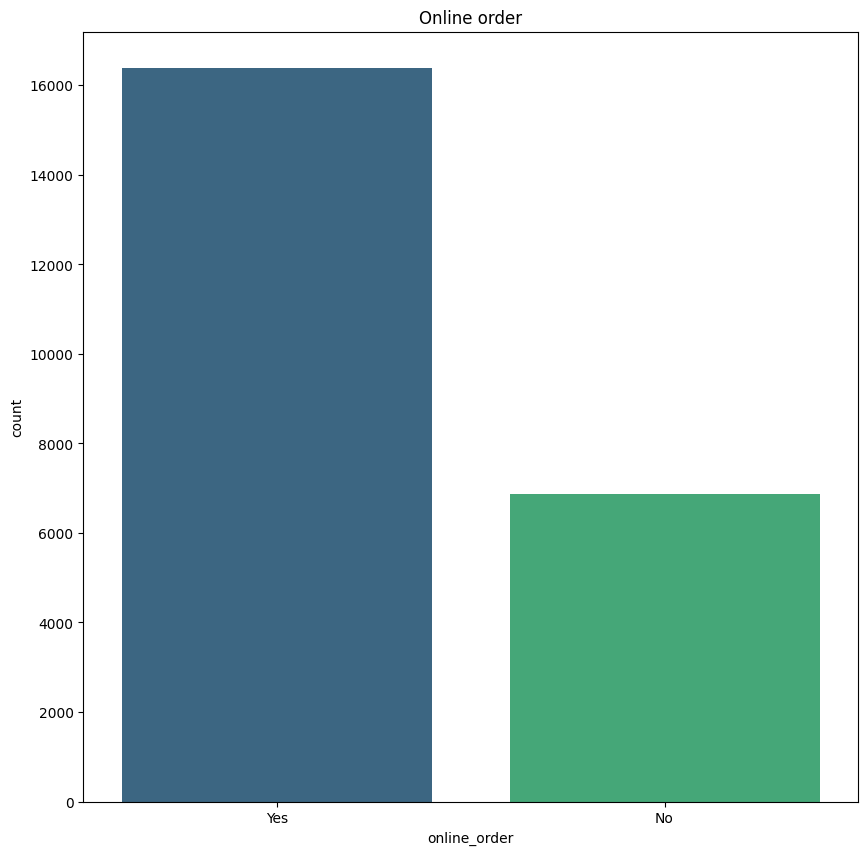

In [45]:
# online or not
sns.countplot(x=df['online_order'], hue=df['online_order'], palette='viridis', legend=False)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Online order')
plt.show()

<Axes: xlabel='rate', ylabel='Density'>

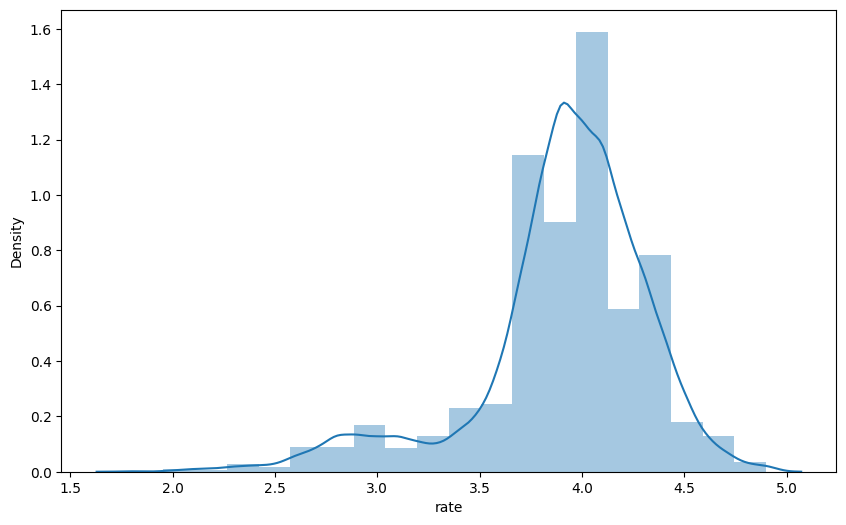

In [49]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['rate'], bins=20)

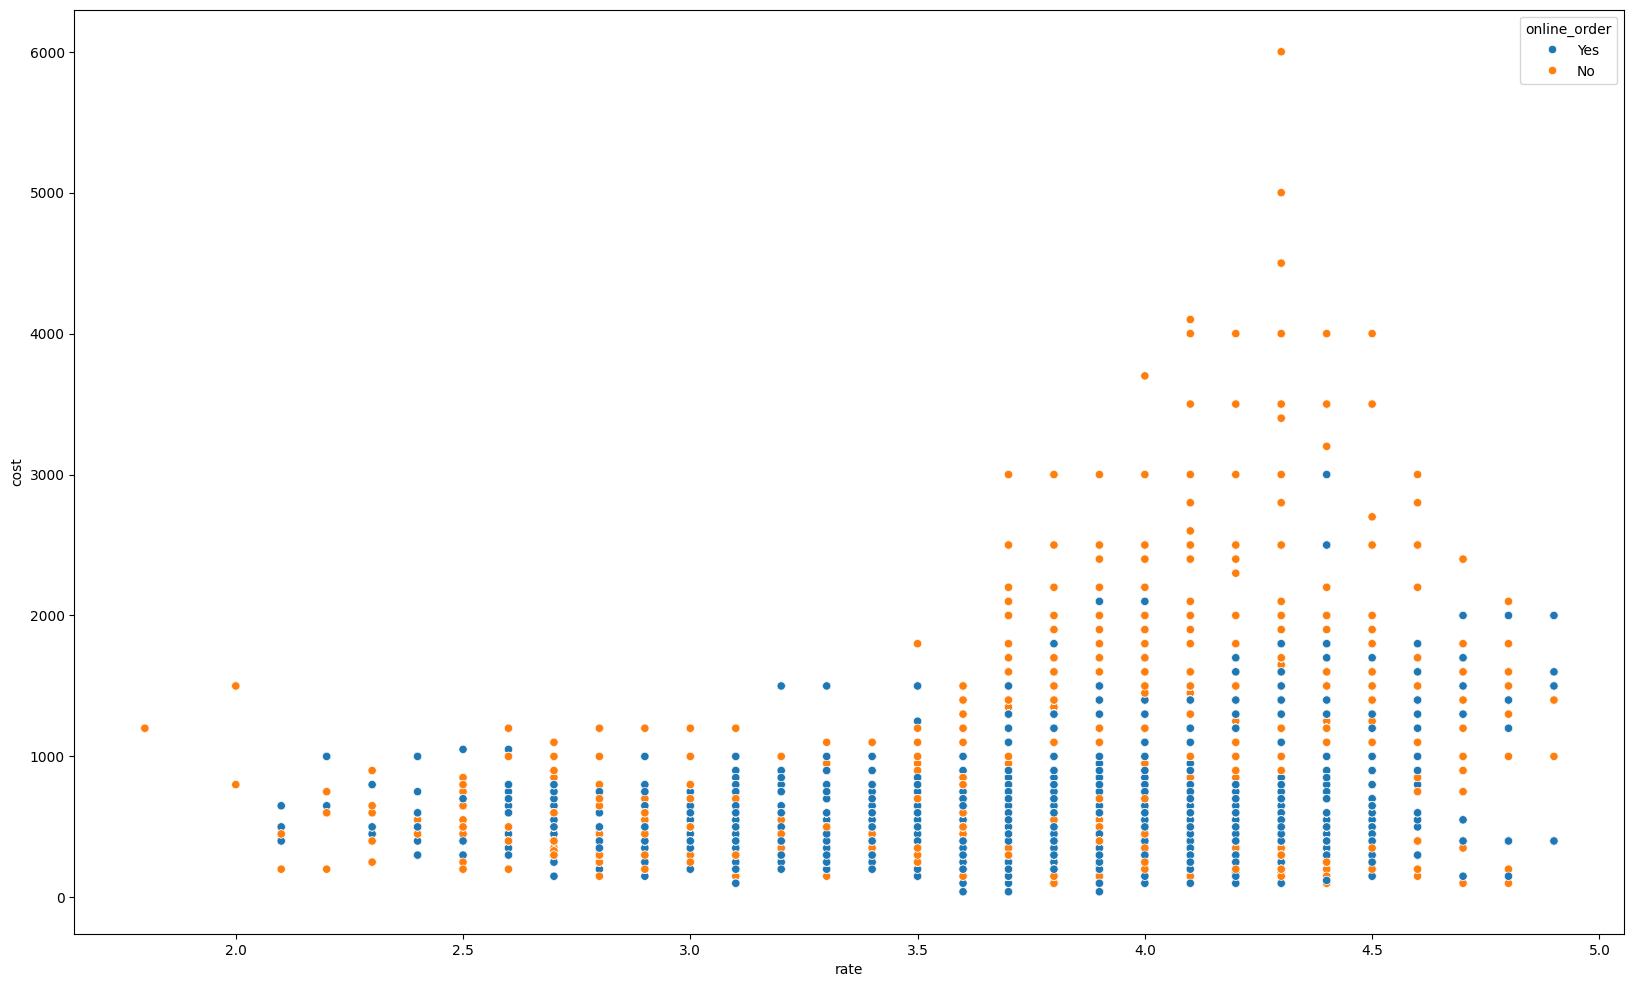

In [50]:
# distribution of the cost vs ratings in parallel with online order
plt.figure(figsize=(20,12))
sns.scatterplot(x='rate', y='cost', hue='online_order', data=df)
plt.show()

In [52]:
print(df['rate'].min())
print(df['rate'].max())

1.8
4.9


In [55]:
((df['rate']>=1) & (df['rate']<2)).sum()

np.int64(5)

In [59]:
((df['rate']>=2) & (df['rate']<3)).sum()

np.int64(1179)

In [60]:
((df['rate']>=3) & (df['rate']<4)).sum()

np.int64(10153)

In [61]:
(df['rate']>=4).sum()

np.int64(11911)

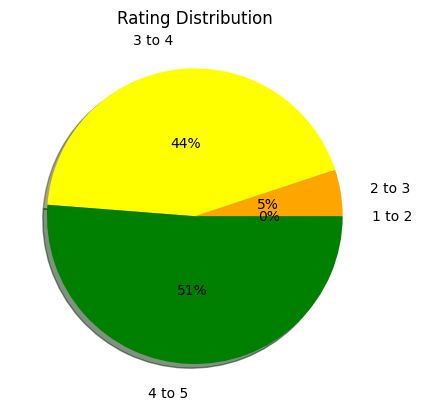

In [62]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
         ((df['rate']>=3) & (df['rate']<4)).sum(),
         (df['rate']>=4).sum()]

labels=['1 to 2', '2 to 3', '3 to 4', '4 to 5']
color=['red', 'orange', 'yellow', 'green']

plt.pie(slices, labels=labels, colors=color, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, shadow=True)
fig = plt.gcf()
plt.title('Rating Distribution')
plt.show()

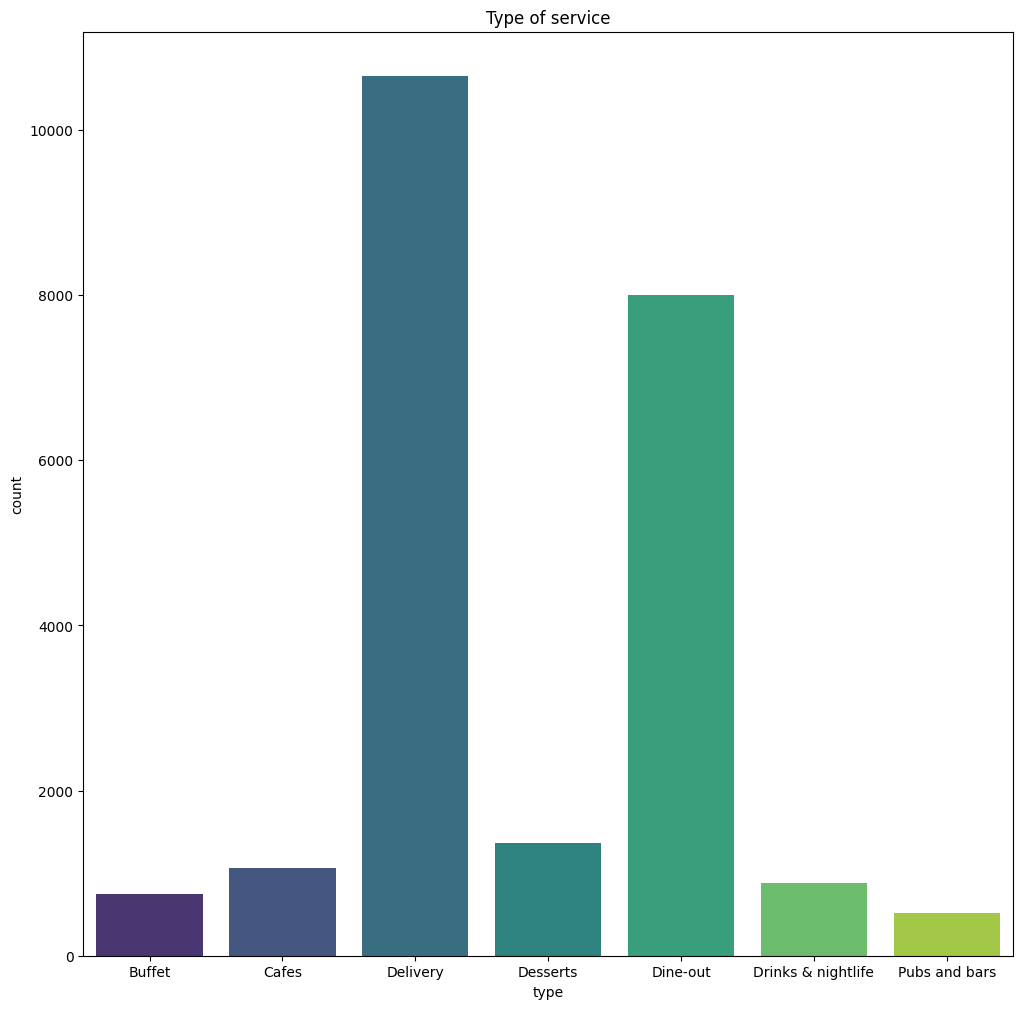

In [77]:
# services type

sns.countplot(x=df['type'], hue=df['type'], palette='viridis', legend=False)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of service')
plt.show()

In [81]:
# distribution ofcos oftwo people

trace0=go.Box(y=df['cost'], name="accepting online orders",
              marker= dict(color='rgb(113, 10, 100)'),)

data=[trace0]
layout=go.Layout(title="Box plot of approximate cost", width=800, height=800, yaxis=dict(title='Price'))
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

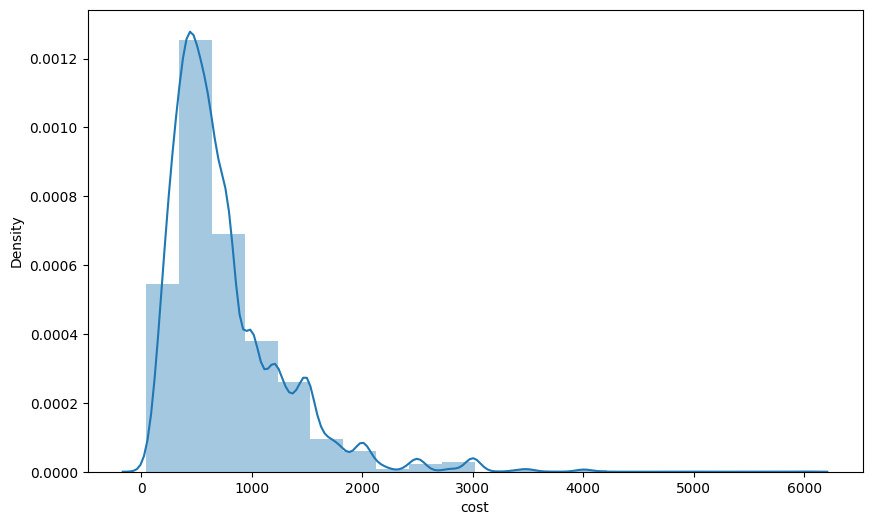

In [82]:
plt.figure(figsize=(10, 6))
sns.distplot(df['cost'], bins=20)
plt.show()

In [83]:
# most liked dishes
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [85]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [86]:
print("Most liked dishes")
liked_foods= pd.Series(likes).value_counts()
liked_foods.head(30)

Most liked dishes


,count
Pasta,2692
Pizza,1915
Cocktails,1880
Burgers,1736
Mocktails,1623
Biryani,1307
Sandwiches,1287
Burgers,1256
Coffee,1184
Nachos,1170


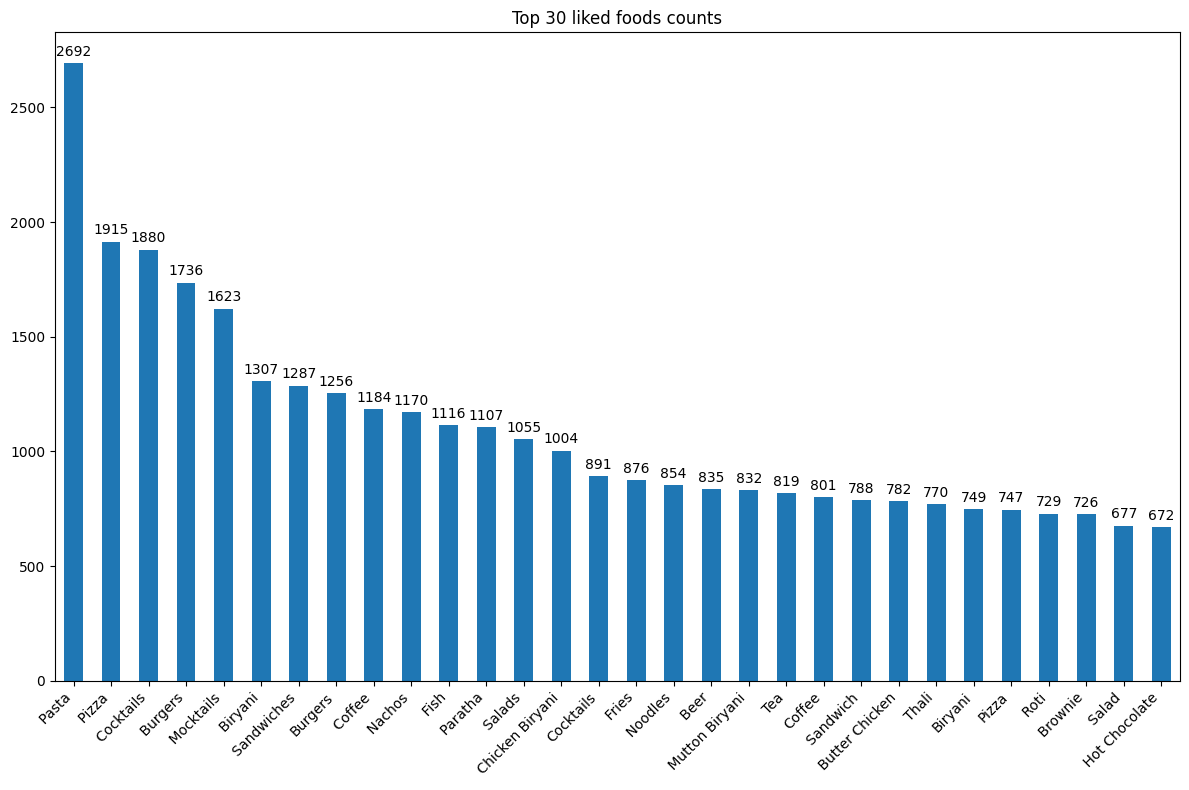

In [98]:
ax = liked_foods.nlargest(n=30, keep='first').plot(kind='bar',figsize=(12,8), title='Top 30 liked foods counts') # Changed n=20 to n=30, adjusted figsize for better labels

for i in ax.patches:
    # Improved annotation placement: centered horizontally, slightly above the bar
    ax.annotate(str(int(i.get_height())),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3), textcoords='offset points') # Offset text slightly up

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

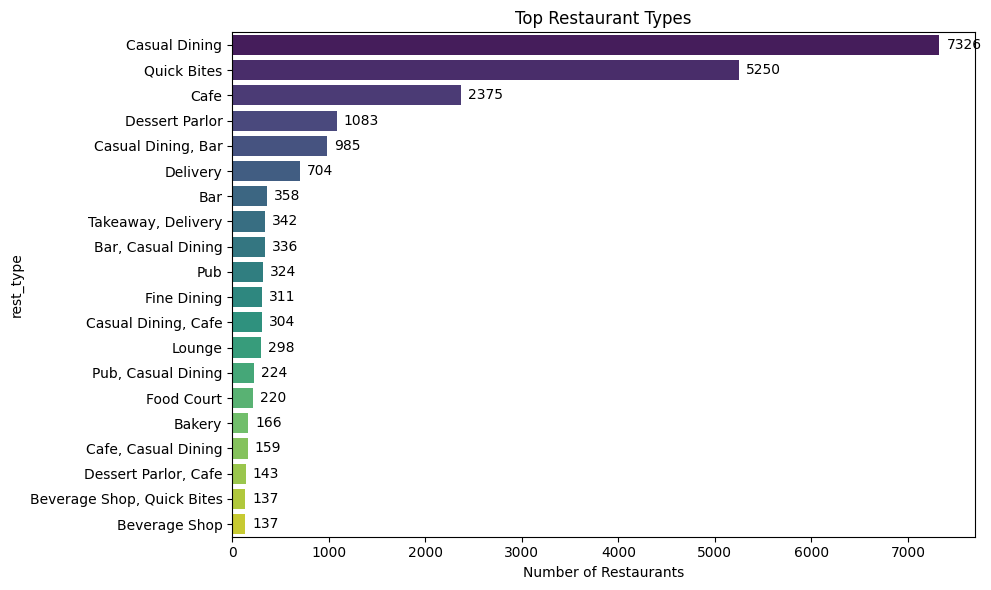

In [108]:
#Restaurant type and their counts

rest=df['rest_type'].value_counts()[:20]
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=rest, y=rest.index, palette='viridis')
plt.xlabel('Number of Restaurants')
plt.title('Top Restaurant Types')
for i in ax.patches:
    # Correct annotation placement for horizontal bars
    ax.annotate(str(int(i.get_width())),
                (i.get_width(), i.get_y() + i.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points') # Offset text to the right of the bar
plt.tight_layout()
plt.show()

Building model

In [110]:
df.online_order[df['online_order'] == 'Yes'] = 1
df.online_order[df['online_order'] == 'No'] = 0

In [111]:
df.online_order.value_counts()

,count
online_order,
1,16378
0,6870


In [113]:
df.online_order = pd.to_numeric(df.online_order)

In [115]:
df.book_table[df['book_table'] == 'Yes'] = 1
df.book_table[df['book_table'] == 'No'] = 0

In [116]:
df.book_table.value_counts()

,count
book_table,
0,17191
1,6057


In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [118]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [119]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [121]:
my_data = df.iloc[:, [2,3,4,5,6,7,9,10,12]]
my_data.to_csv('zomato_df.csv')

In [122]:
x = df.iloc[:, [2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [123]:
y = df['rate']
y

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
23243,3.8
23244,3.9
23245,2.8
23246,2.5


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [127]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [128]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(x_test)
r2_score(y_test, y_pred)

0.2233033484225515

In [129]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=650,random_state=42,min_samples_leaf=.0001)
RF_model.fit(x_train, y_train)
y_predict = RF_model.predict(x_test)
r2_score(y_test, y_predict)

0.8800069723999693

In [130]:
ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train, y_train)
y_predict = ET_model.predict(x_test)
r2_score(y_test, y_predict)

0.925668384472555

In [133]:
# pickle to save our model so we can use it later
import pickle
filename = 'zomato_model.pkl'
pickle.dump(ET_model, open(filename, 'wb'))
model=pickle.load(open(filename, 'rb'))